In [85]:
from keras.datasets import fashion_mnist
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, geom_point, aes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import itertools
import matplotlib as mpl
%matplotlib inline

In [86]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0],-1))
X_test_scaled = scaler.fit_transform(x_test.reshape(x_test.shape[0],-1))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=["PCA_1", "PCA_2"])

gmm = GaussianMixture(n_components=10)
gmm.fit(X_pca)

GaussianMixture(n_components=10)

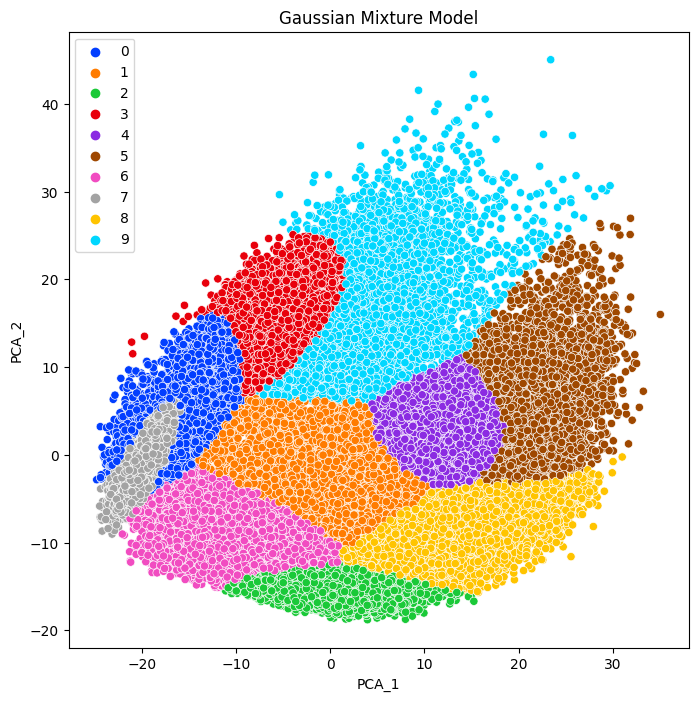

In [89]:
plt.figure(figsize=(8,8))
predictions = gmm.predict(X_pca)
g = sns.scatterplot(x="PCA_1", y="PCA_2", hue=predictions, data=pca_df, palette=sns.color_palette("bright")).set(title='Gaussian Mixture Model')